In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

athletes = pd.read_csv('athletes.csv')
noc = pd.read_csv('noc.csv')

## NOC dataset

In [6]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [8]:
noc.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [9]:
noc.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

## Athletes dataset

In [2]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [11]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
athletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Country analysis

### Most athletes

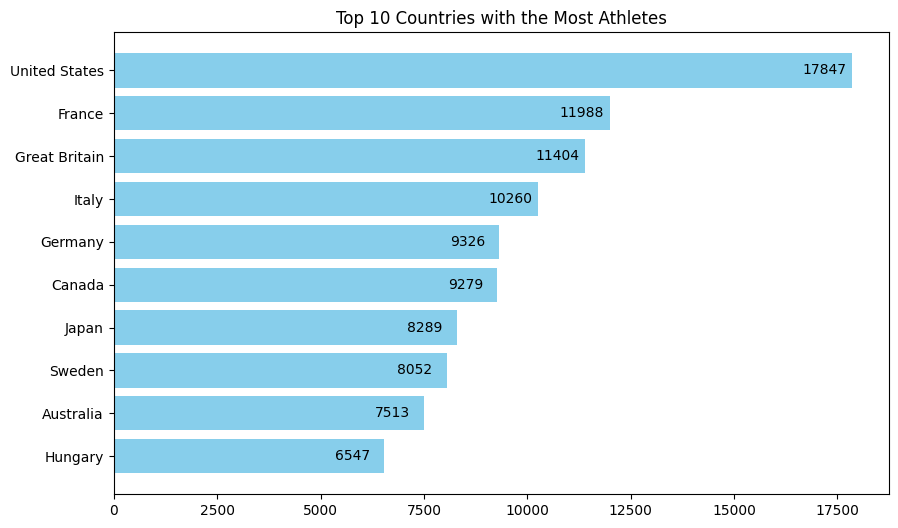

In [52]:
top_10_most_athletes = athletes['Team'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_most_athletes.index, top_10_most_athletes.values, color='skyblue')
plt.title('Top 10 Countries with the Most Athletes')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding values inside each bar
for bar, value in zip(bars, top_10_most_athletes.values):
    plt.text(bar.get_width() - 1200, bar.get_y() + bar.get_height() / 2, f'{value}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### Most gold medals

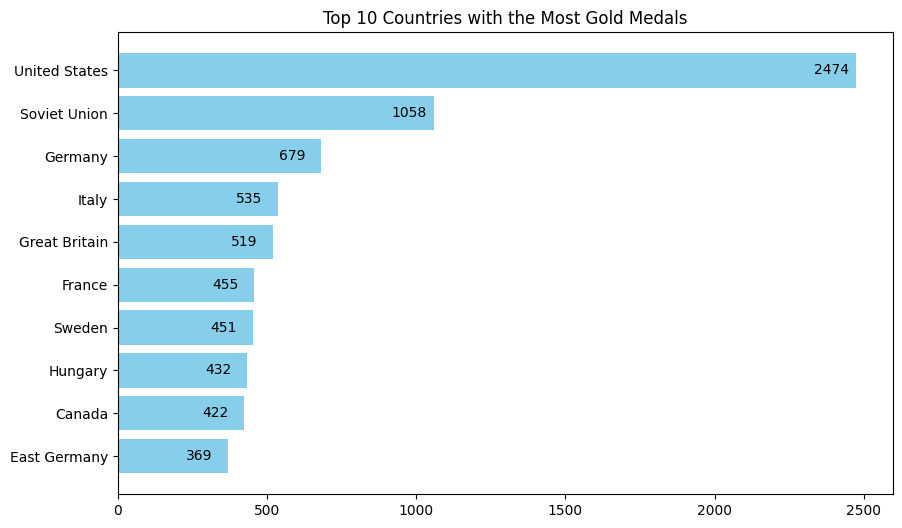

In [57]:
gold_medals = athletes[athletes['Medal'] == 'Gold']
top_10_gold_medals = gold_medals['Team'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_gold_medals.index, top_10_gold_medals.values, color='skyblue')
plt.title('Top 10 Countries with the Most Gold Medals')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding values inside each bar
for bar, value in zip(bars, top_10_gold_medals.values):
    plt.text(bar.get_width() - 140, bar.get_y() + bar.get_height() / 2, f'{value}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### Most total medals

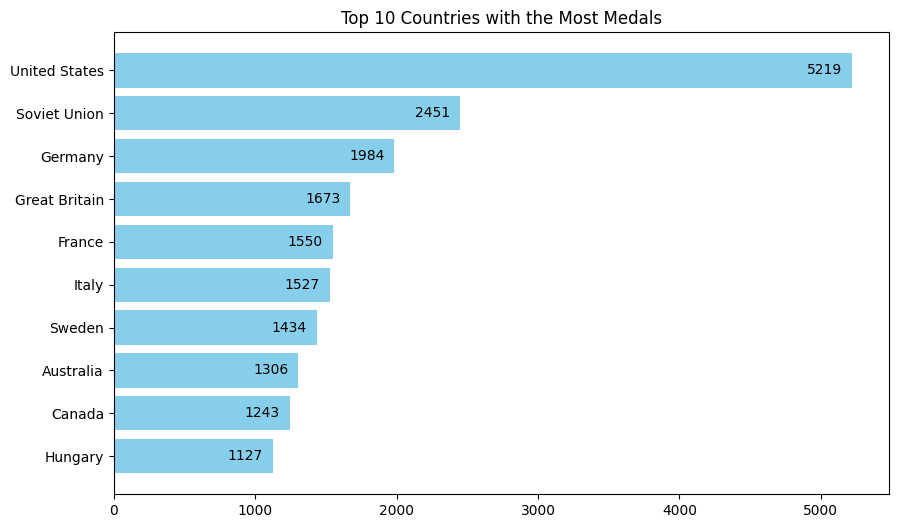

In [62]:
total_medals = athletes[athletes['Medal'].notnull()]
top_10_total_medals = total_medals['Team'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_total_medals.index, top_10_total_medals.values, color='skyblue')
plt.title('Top 10 Countries with the Most Medals')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding values inside each bar
for bar, value in zip(bars, top_10_total_medals.values):
    plt.text(bar.get_width() - 320, bar.get_y() + bar.get_height() / 2, f'{value}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### All-time medal table

In [68]:
medal_counts = athletes.groupby(['Team', 'Medal']).size().unstack(fill_value=0)
medal_counts['Total'] = medal_counts.sum(axis=1)
medal_table = medal_counts[['Gold', 'Silver', 'Bronze', 'Total']].sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)
medal_table.head(10)

Medal,Gold,Silver,Bronze,Total
Team,,,,
United States,2474,1512,1233,5219
Soviet Union,1058,716,677,2451
Germany,679,627,678,1984
Italy,535,508,484,1527
Great Britain,519,582,572,1673
France,455,518,577,1550
Sweden,451,476,507,1434
Hungary,432,330,365,1127
Canada,422,413,408,1243


### Fewest medals all-time

In [72]:
medal_table.sort_values(by='Total').head(30)

Medal,Gold,Silver,Bronze,Total
Team,,,,
Turquoise-1,0,0,1,1
Camille,1,0,0,1
Carabinier-15,1,0,0,1
Cicely-1,1,0,0,1
Elvis Va,1,0,0,1
Fantlet-7,1,0,0,1
Femur-1,1,0,0,1
Jordan,1,0,0,1
Kosovo,1,0,0,1


## Rio 2016

In [3]:
rio = athletes[athletes['Year'] == 2016]
rio.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


In [4]:
# Quantas medalhas?
rio['Medal'].value_counts()

Bronze    703
Gold      665
Silver    655
Name: Medal, dtype: int64

In [13]:
# Medalhas por esporte
rio[rio['Medal'].notnull()].groupby(['Team', 'Sport', 'Medal'])[['Event']].nunique().reset_index()

,Team,Sport,Medal,Event
0,Algeria,Athletics,Silver,2
1,Argentina,Hockey,Gold,1
2,Argentina,Judo,Gold,1
3,Argentina,Sailing,Gold,1
4,Argentina,Tennis,Silver,1
...,...,...,...,...
617,Venezuela,Athletics,Silver,1
618,Venezuela,Boxing,Bronze,1
619,Venezuela,Cycling,Bronze,1
620,Vietnam,Shooting,Gold,1


In [19]:
medalhas = athletes.groupby(['Team', 'Event', 'Medal'])[['Event']].nunique().index
medalhas = medalhas.to_frame().reset_index(drop=True)
medalhas.pivot_table(values='Team', index='Event', columns='Medal', aggfunc='first')

Medal,Bronze,Gold,Silver
Event,,,
Aeronautics Mixed Aeronautics,NaN,Switzerland,NaN
Alpine Skiing Men's Combined,Austria,Austria,Austria
Alpine Skiing Men's Downhill,Austria,Austria,Austria
Alpine Skiing Men's Giant Slalom,Austria,Austria,Austria
Alpine Skiing Men's Slalom,Austria,Austria,Austria
...,...,...,...
"Wrestling Women's Flyweight, Freestyle",Azerbaijan,Canada,Azerbaijan
"Wrestling Women's Heavyweight, Freestyle",China,Canada,Bulgaria
"Wrestling Women's Light-Heavyweight, Freestyle",Kazakhstan,Japan,Russia


<Axes: >

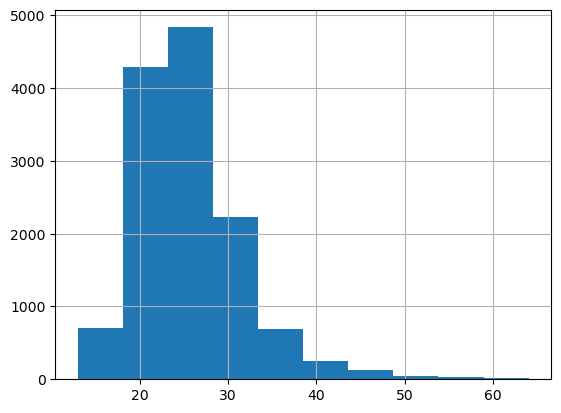

In [25]:
# Gold medals
gold = athletes[athletes['Medal'] == 'Gold'].copy()
gold['Age'].hist()